## Install Libraries

In [1]:
!pip install -U augly
!sudo apt-get install python3-magic

Requirement already up-to-date: augly in /usr/local/lib/python3.7/dist-packages (0.1.2)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


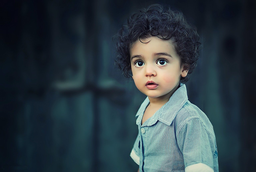

In [17]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = os.path.join(
    utils.TEST_URI, "image", "inputs", "child-817373_1280.jpg"
)

# We can use the AugLy scale augmentation
input_img = imaugs.scale(input_img_path, factor=0.2)
display(input_img)

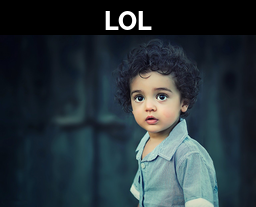

In [20]:
# Now we can apply various augmentations to the scaled image!
display(
    imaugs.meme_format(
        input_img,
        caption_height=35,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )
)

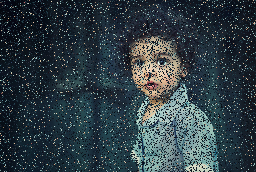

[{'dst_height': 172,
  'dst_width': 256,
  'factor': 0.3,
  'intensity': 30.0,
  'name': 'shuffle_pixels',
  'output_path': None,
  'seed': 10,
  'src_height': 172,
  'src_width': 256}]

In [21]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended, including kwargs, input & output dimensions,
and intensity (defined based on the kwargs for each augmentation).
"""
meta = []
display(imaugs.shuffle_pixels(input_img, factor=0.3, metadata=meta))
meta

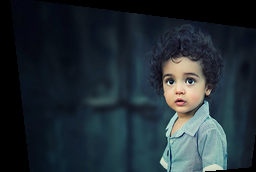

[{'crop_out_black_border': False,
  'dst_height': 172,
  'dst_width': 256,
  'dx': 0.0,
  'dy': 0.0,
  'intensity': 20.0,
  'name': 'perspective_transform',
  'output_path': None,
  'seed': 42,
  'sigma': 20.0,
  'src_height': 172,
  'src_width': 256}]

In [22]:
# For all the augmentations, we have class-based definitions as well as
# functional
meta = []
aug = imaugs.PerspectiveTransform(sigma=20.0)
display(aug(input_img, metadata=meta))
meta

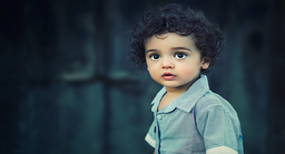

[]

In [23]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.RandomAspectRatio()
display(aug(input_img))
meta

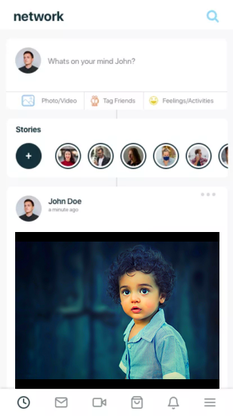

In [27]:
# You can also compose several transformations together
aug = imaugs.Compose(
    [
        imaugs.Saturation(factor=2.0),
        imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        ),
        imaugs.Scale(factor=0.8),
    ]
)
display(aug(input_img))